In [1]:
clear all
set more off
eststo clear
capture log close _all
capture version 15

In [5]:
/* Stata code for Table 3.1.2   */
/* Required additional packages */
log using "Table 3-1-2-Stata.txt", name(table030102) text replace

/* Download data */

log file already open


r(604);


In [6]:
shell curl -o asciiqob.zip http://economics.mit.edu/files/397
unzipfile asciiqob.zip, replace



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1988k  100 1988k    0     0  1914k      0  0:00:01  0:00:01 --:--:-- 1914k

    inflating: asciiqob.txt
successfully unzipped asciiqob.zip to current directory


In [7]:
/* Import data */
infile lwklywge educ yob qob pob using asciiqob.txt, clear

/* Get fitted line */
regress lwklywge educ
predict yhat, xb

/* Calculate means by collapsing the data */


(329,509 observations read)


      Source |       SS           df       MS      Number of obs   =   329,509
-------------+----------------------------------   F(1, 329507)    =  43782.56
       Model |    17808.83         1    17808.83   Prob > F        =    0.0000
    Residual |  134029.045   329,507  .406756292   R-squared       =    0.1173
-------------+----------------------------------   Adj R-squared   =    0.1173
       Total |  151837.875   329,508  .460801788   Root MSE        =    .63777

------------------------------------------------------------------------------
    lwklywge |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |    .070851   .0003386   209.24   0.000     .0701874    .0715147
       _cons |   4.995182   .0044644  1118.88   0.000     4.986432    5.003932
------------------------------------------------------------------------------




In [8]:
collapse lwklywge yhat, by(educ)

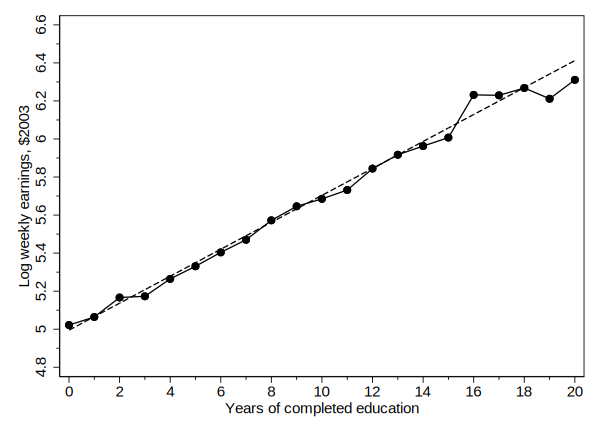

In [9]:
/* Graph the figures */
graph twoway (connected lwklywge educ, lcolor(black) mcolor(black)) ///
			 (line yhat educ, lcolor(black) lpattern("-")),         ///
			 ylabel(4.8(0.2)6.6) ymtick(4.9(0.2)6.5)                ///
			 xlabel(0(2)20) xmtick(1(2)19)                          ///
             ytitle("Log weekly earnings, $2003")                   ///
             xtitle("Years of completed education")                 ///
             legend(off)                                            ///
			 scheme(s1mono)